In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

print('Train:', x_train.shape)
print('Test :', x_test.shape)

Train: (50000, 32, 32, 3)
Test : (10000, 32, 32, 3)


In [3]:
x_train = x_train / 255.0
x_test  = x_test / 255.0

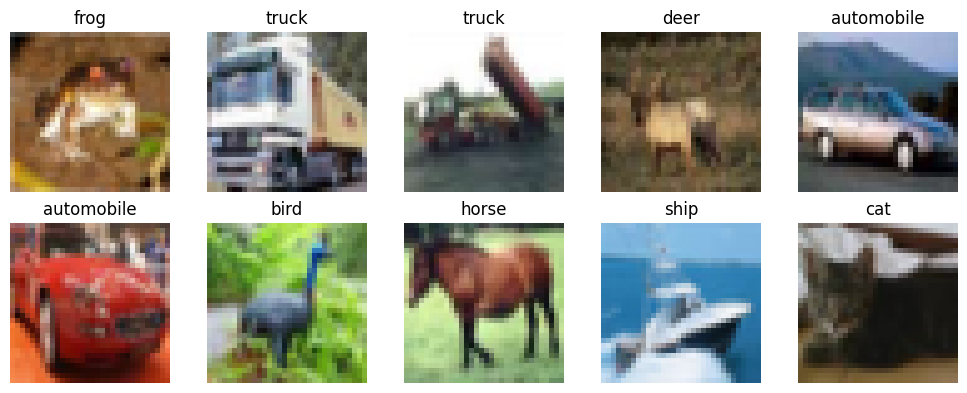

In [4]:
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.tight_layout()
plt.show()

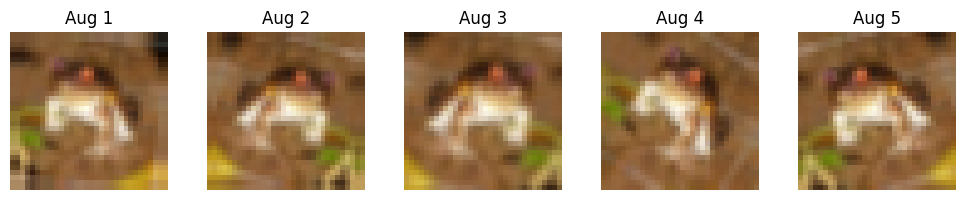

In [5]:
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip('horizontal'),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.1),
])

# Show augmented examples
plt.figure(figsize=(10, 2))
sample = x_train[0]
for i in range(5):
    plt.subplot(1, 5, i+1)
    augmented = data_augmentation(tf.expand_dims(sample, 0))
    plt.imshow(augmented[0])
    plt.title(f'Aug {i+1}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [6]:
model = keras.Sequential([
    # Data augmentation
    data_augmentation,

    # Block 1
    keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),

    # Block 2
    keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2,2)),

    # Block 3
    keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2,2)),

    # Classifier
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

C:\Users\singh\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (1, 32, 32, 3)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (1, 32, 32, 32)        │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (1, 16, 16, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (1, 16, 16, 64)        │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (1, 8, 8, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (1, 8, 8, 128)         │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (1, 4, 4, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (1, 2048)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (1, 128)               │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (1, 128)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (1, 10)                │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(x_test, y_test)
)

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 93s 64ms/step - accuracy: 0.3405 - loss: 1.7968 - val_accuracy: 0.4728 - val_loss: 1.4174
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 144s 184ms/step - accuracy: 0.4591 - loss: 1.5053 - val_accuracy: 0.5304 - val_loss: 1.3102
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 133s 168ms/step - accuracy: 0.5047 - loss: 1.3859 - val_accuracy: 0.5632 - val_loss: 1.2004
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 49ms/step - accuracy: 0.5387 - loss: 1.3057 - val_accuracy: 0.5986 - val_loss: 1.1162
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 95s 121ms/step - accuracy: 0.5604 - loss: 1.2413 - val_accuracy: 0.6139 - val_loss: 1.1101
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 262s 336ms/step - accuracy: 0.5843 - loss: 1.1950 - val_accuracy: 0.6497 - val_loss: 0.9878
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 292s 373ms/step - accuracy: 0.5932 - loss: 1.1639 - val_accuracy: 0.6276 - val_loss: 1.0914
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 306s 392ms/step - accuracy: 0.6086 - loss

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc*100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7163 - loss: 0.8253
Test Accuracy: 71.63%


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


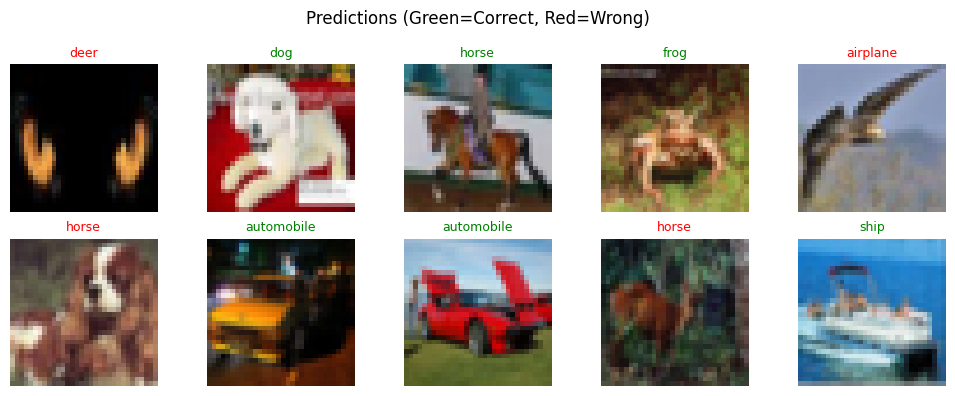

In [10]:
y_pred = np.argmax(model.predict(x_test), axis=1)

plt.figure(figsize=(10, 4))
for i in range(10):
    idx = np.random.randint(len(x_test))
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[idx])
    color = 'green' if y_pred[idx] == y_test[idx] else 'red'
    plt.title(f'{class_names[y_pred[idx]]}', color=color, fontsize=9)
    plt.axis('off')
plt.suptitle('Predictions (Green=Correct, Red=Wrong)')
plt.tight_layout()
plt.show()

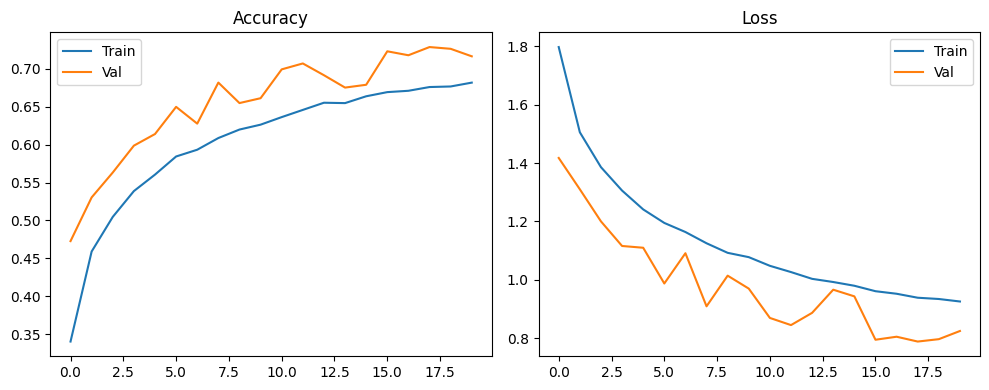

In [11]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title('Loss')
plt.legend()

plt.tight_layout()
plt.show()